In [4]:
# Importing libraries in Python
import pandas as pd
import numpy as np

I uploaded the data set http://m.uploadedit.com/busd/1595346534253.csv

In [5]:
df=pd.read_csv("http://m.uploadedit.com/busd/1595346534253.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Understanding the Data


I have downloaded the data set it has the following
- **Ship Mode** e.g. Second Class
- **Segment** e.g. Consumer
- **Country** e.g. United States
- **City** e.g. Henderson
- **State** e.g. Florida
- **Postal Code** 42420
- **Region** e.g. South
- **Category** e.g. Furniture
- **Quantity** e.g. 4
- **Discount** e.g. 0.00
- **Profit** e.g. -52.89


<h2 id="pattern_visualization">2. Analyzing Individual Feature Patterns using Visualization</h2>




In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<h4>How to choose the right visualization method?</h4>
<p>When visualizing individual variables, it is important to first understand what type of variable you are dealing with. This will help us find the right visualization method for that variable.</p>


(0.0, 9149.9737)

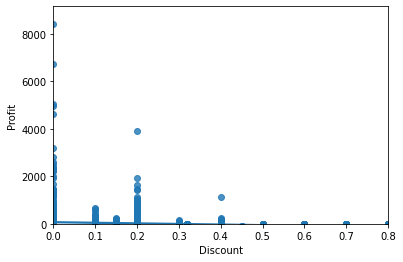

In [6]:
# Engine size as potential predictor variable of price
sns.regplot(x="Discount", y="Profit", data=df)
plt.ylim(0,)

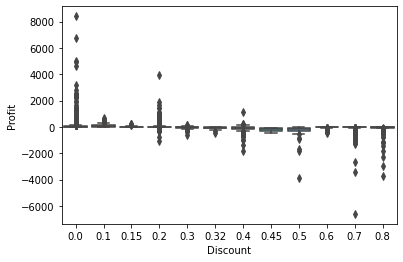

In [19]:
sns.boxplot(x="Discount", y="Profit", data=df)

In [8]:
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


  There is no significant relation between any of the parameters 

<h3>2. Categorical variables</h3>

<p>These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.</p>

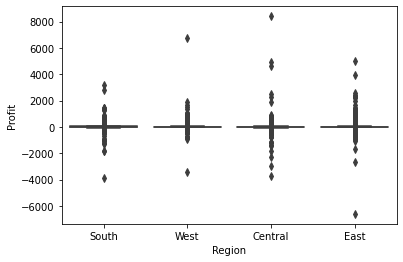

In [14]:
sns.boxplot(x="Region", y="Profit", data=df)

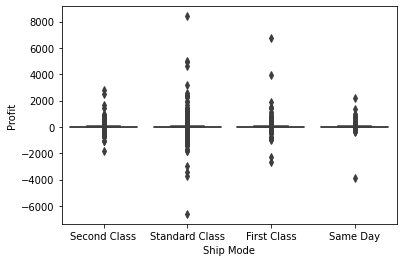

In [10]:
sns.boxplot(x="Ship Mode", y="Profit", data=df)

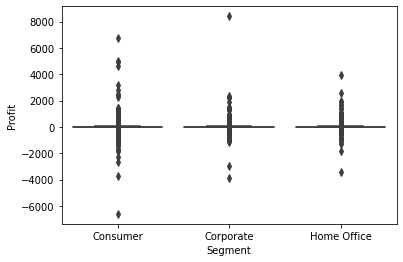

In [11]:
sns.boxplot(x="Segment", y="Profit", data=df)

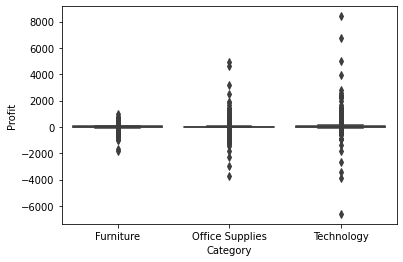

In [15]:
sns.boxplot(x="Category", y="Profit", data=df)

By looking box plots alone we cant make any decison, but In category vs profit **The furniture Category has more losses.** 

<h2 id="discriptive_statistics">3. Descriptive Statistical Analysis</h2>

<p>Let's first take a look at the variables by utilizing a description method.</p>

<p>The <b>describe</b> function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.</p>

This will show:
<ul>
    <li>the count of that variable</li>
    <li>the mean</li>
    <li>the standard deviation (std)</li> 
    <li>the minimum value</li>
    <li>the IQR (Interquartile Range: 25%, 50% and 75%)</li>
    <li>the maximum value</li>
<ul>


In [16]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
The default setting of "describe" skips variables of type object. We can apply the method "describe" on the variables of type 'object' as follows:

In [17]:
df.describe(include=['object'])

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
count,9994,9994,9994,9994,9994,9994,9994,9994
unique,4,3,1,531,49,4,3,17
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders
freq,5968,5191,9994,915,2001,3203,6026,1523


<h2 id="basic_grouping">4. Grouping</h2>

<p>The "groupby" method groups data by different categories. The data is grouped based on one or several variables and analysis is performed on the individual groups.</p>



In [23]:
df_group_one = df[['Category','Profit','Sales']]

<p>If we want to know, on average, which type Category is contributing to losses, we can group "Category" and then average them.</p>

<p>We can select the columns 'Category', 'Sales' and 'Profit', then assign it to the variable "df_group_one".</p>

In [24]:
# grouping results
df_group_one = df_group_one.groupby(['Category'],as_index=False).mean()
df_group_one

,Category,Profit,Sales
0,Furniture,8.699327,349.834887
1,Office Supplies,20.327050,119.324101
2,Technology,78.752002,452.709276


From box plot it appeared that the profits for Furniture Category is low by the above result it is confirmed the company needs to focus on Furniture sales as they are second most selling category. 

Further we will see the same analysis for diffrent sub categories

In [25]:
# grouping results
df_gptest = df[['Category','Sub-Category','Profit','Sales']]
grouped_test1 = df_gptest.groupby(['Category','Sub-Category'],as_index=False).mean()
grouped_test1

,Category,Sub-Category,Profit,Sales
0,Furniture,Bookcases,-15.230509,503.859633
1,Furniture,Chairs,43.095894,532.332420
2,Furniture,Furnishings,13.645918,95.825668
3,Furniture,Tables,-55.565771,648.794771
4,Office Supplies,Appliances,38.922758,230.755710
5,Office Supplies,Art,8.200737,34.068834
6,Office Supplies,Binders,19.843574,133.560560
7,Office Supplies,Envelopes,27.418019,64.867724
8,Office Supplies,Fasteners,4.375660,13.936774
9,Office Supplies,Labels,15.236962,34.303055


## Following subcategories are with low profits
Furniture
<ul>
    <li>Bookcases</li>
    <li>Tables</li>
</ul>
Office supplies
<ul>
    <li>Art</li>
    <li>Fasteners</li>
    <li>Supplies</li>

Now we wiil see if there is any effect by the location of customers 

In [34]:
df_group_two = df[['Region','Profit','Sales']]
# grouping results
df_group_two = df_group_two.groupby(['Region'],as_index=False).mean()
df_group_two

,Region,Profit,Sales
0,Central,17.092709,215.772661
1,East,32.135808,238.336110
2,South,28.857673,241.803645
3,West,33.849032,226.493233


There is no significant diffrence in sales in diffrent regions 

In [36]:
df_group_two = df[['State','City','Profit','Sales']]
# grouping results
df_group_two = df_group_two.groupby(['State'],as_index=False).mean()
df_group_two

,State,Profit,Sales
0,Alabama,94.865989,319.846557
1,Arizona,-15.303235,157.508933
2,Arkansas,66.811452,194.635500
3,California,38.171608,228.729451
4,Colorado,-35.867351,176.418231
5,Connecticut,42.823071,163.223866
6,Delaware,103.930988,285.948635
7,District of Columbia,105.958930,286.502000
8,Florida,-8.875461,233.612815
9,Georgia,88.315453,266.825217


In [38]:
rslt_df = df_group_two[df_group_two['Profit'] < 10] 

Following states are giving low profits the company should try to improve the sales in these regions, they can try to advertise more in these regions and increse their productions

In [39]:
rslt_df

,State,Profit,Sales
1,Arizona,-15.303235,157.508933
4,Colorado,-35.867351,176.418231
8,Florida,-8.875461,233.612815
11,Illinois,-25.625787,162.939230
31,North Carolina,-30.083985,223.305880
33,Ohio,-36.186304,166.861697
35,Oregon,-9.600569,140.573790
36,Pennsylvania,-26.507598,198.487077
40,Tennessee,-29.189583,167.551219
41,Texas,-26.121174,172.779742


Now lets see if there is any relation between discount and Profit 

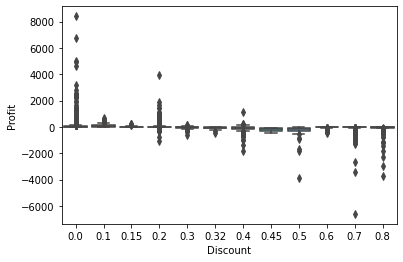

In [41]:
sns.boxplot(x="Discount", y="Profit", data=df)

We can conclude from the graph that as the discount is increased the profits are decreased 

In [40]:
df_group_three = df[['Discount','Profit','Sales']]
# grouping results
df_group_three = df_group_three.groupby(['Discount'],as_index=False).mean()
df_group_three

,Discount,Profit,Sales
0,0.00,66.900292,226.742074
1,0.10,96.055074,578.397351
2,0.15,27.288298,529.971567
3,0.20,24.702572,209.076940
4,0.30,-45.679636,454.742974
5,0.32,-88.560656,536.794770
6,0.40,-111.927429,565.134874
7,0.45,-226.646464,498.634000
8,0.50,-310.703456,892.705152
9,0.60,-43.077212,48.150000


We can see that for discount of more than 0.2 there in loss in sales However sales are increasing. 
Observing the graph and the dataframe above the company should keep a discout of 0.1-0.2 as there is increased sales and also good profit

From box plots we didnt get any significant change in profit by the Shipping mode lets see that by grouping the data

In [45]:
df_group_four = df[['Ship Mode','Profit','Sales']]
df_group_four = df_group_four.groupby(['Ship Mode'],as_index=False).mean()
df_group_four

,Ship Mode,Profit,Sales
0,First Class,31.839948,228.497024
1,Same Day,29.266591,236.396179
2,Second Class,29.535545,236.089239
3,Standard Class,27.494770,227.583067


Still we can see there is no change in sales in any specific Shipping mode

From box plots we didnt get any significant change in profit by the Segment lets see that by grouping the data

In [48]:
df_group_five = df[['Segment','Profit','Sales']]
df_group_five = df_group_five.groupby(['Segment'],as_index=False).mean()
df_group_five

,Segment,Profit,Sales
0,Consumer,25.836873,223.733644
1,Corporate,30.456667,233.823300
2,Home Office,33.818664,240.972041


# Conclusion

<ul>
    <li>Discount should be kept 0.1-0.2 </li>
    <li>For increasing sales only the products which are profitable can be given discount of more than 0.2 like Copiers, accesories etc</li>
    <li>Concentrating on the states with less profits like Ohio Arizona etc.. Increase advertisng, provide better shipping services there  </li> 
    <li> Furniture sales result in losses more, check quality or any issue in furnitures, decrease the discounts offered on furniture</li>
   <li> Reduce the discount on the products that are underperforming </li>
<ul>